# S4 実験用シルエット画像データの生成

In [85]:
import sys,os
try:
    from google.colab import drive
    drive.mount('/content/drive')
    sys.path.append('/content/drive/My Drive/RadishLab')
    COLABORATORY = True
except ImportError:
    COLABORATORY = False
    sys.path.append('./rdlib')
import rdlib.rdlib4 as rd

import numpy as np
import matplotlib.pyplot as plt
import cv2

# サンプルの画像フォルダのパス
if COLABORATORY:
    SF = '/content/drive/My Drive/RadishLab/RDSamples/silhoette' # シルエット画像フォルダ
    SRCF = '/content/drive/My Drive/RadishLab/RDSamples/cropped' # 原画像フォルダ
    MSF =  '/content/drive/My Drive/RadishLab/RDSamples/silhoetteM' # 余白調節したシルエット画像
    MSRCF =  '/content/drive/My Drive/RadishLab/RDSamples/croppedM' # 上記に対応する原画像
else:
    SF = './RDSamples/silhoette' # シルエット画像フォルダ
    SRCF = './RDSamples/cropped' # 原画像フォルダ
    MSF =  './RDSamples/silhoetteM' # 余白調節したシルエット画像
    MSRCF =  './RDSamples/croppedM' # 上記に対応する原画像


## 目的
S2　あるいは　S3　のインタラクティブ前景抽出により得られたシルエット画像はマージン量がまちまちで位置が偏っていたりするので、位置とマージンを調整し、画像のほぼ中央に対象を配置し、上下左右に均等なマージンをとりたい。

- RDSamples/cropped  原画像から対象を切り出した部分画像、
- RDSamples/silhoette 部分画像のシルエット画像

を例とする。

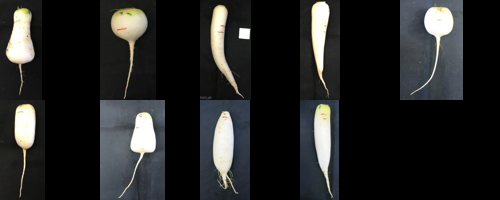

In [88]:
# 切り出した元の画像
rd.makethumbnail(SRCF)

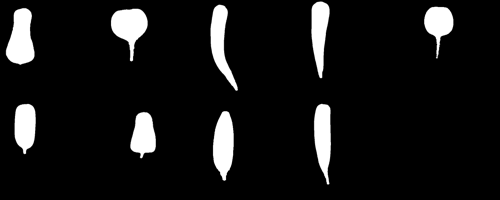

In [89]:
# シルエット画像
rd.makethumbnail(SF)

In [90]:
# ファイル名を確認
imgfiles = rd.collectimagepaths(SF)
imgfiles

['./RDSamples/silhoette\\Sil_17daruma5o03_l.png',
 './RDSamples/silhoette\\Sil_17heians1o04_l.png',
 './RDSamples/silhoette\\Sil_17horyot1o06_l.png',
 './RDSamples/silhoette\\Sil_17horyot2o07_l.png',
 './RDSamples/silhoette\\Sil_17karami1o09_l.png',
 './RDSamples/silhoette\\Sil_17makoto2o06_l.png',
 './RDSamples/silhoette\\Sil_17nezumi2o02_l.png',
 './RDSamples/silhoette\\Sil_17ofukur1o07_l.png',
 './RDSamples/silhoette\\Sil_17tukasa1o02_l.png']

In [5]:
srcimgfiles = rd.collectimagepaths(SRCF)
srcimgfiles

['./RDSamples/cropped\\Sil_17daruma5o03_l_Org.png',
 './RDSamples/cropped\\Sil_17heians1o04_l_Org.png',
 './RDSamples/cropped\\Sil_17horyot1o06_l_Org.png',
 './RDSamples/cropped\\Sil_17horyot2o07_l_Org.png',
 './RDSamples/cropped\\Sil_17karami1o09_l_Org.png',
 './RDSamples/cropped\\Sil_17makoto2o06_l_Org.png',
 './RDSamples/cropped\\Sil_17nezumi2o02_l_Org.png',
 './RDSamples/cropped\\Sil_17ofukur1o07_l_Org.png',
 './RDSamples/cropped\\Sil_17tukasa1o02_l_Org.png']

ここでは、切り出し画像（カラー）のファイル名は、**シルエット画像のファイル名＋\_Org** となずけられているものと仮定する。


# マージンの調整

対象がほぼ中央に収まって上下左右の余白量が均一になるようにマージンを調整したい。

In [91]:
imgs = rd.collectimages(SF)       # シルエット画像のリスト
srcimgs = rd.collectimages(SRCF)  # 対応する原画像のリスト

# マージン調整のプログラム
mm = 32 # 上下左右の余白量
msimg,msrcimg = [],[]
for img,srcimg in zip(imgs,srcimgs):
    img0,x,y,w,h = rd.cutmargin(img,mm=mm,withRect=True) # マージンをつける
    h2,w2 = img0.shape[:2]
    msimg.append(img0)
    img1 = np.zeros((h2,w2,3),np.uint8)
    img1[mm:mm+h,mm:mm+w] = srcimg[y:y+h,x:x+w]
    msrcimg.append(img1)

def resultplot(n):
    plt.figure(dpi=100)
    rd.plotimg(rd.mkparaimage([imgs[n],msimg[n],msrcimg[n],rd.draw2(msimg[n],msrcimg[n])]))

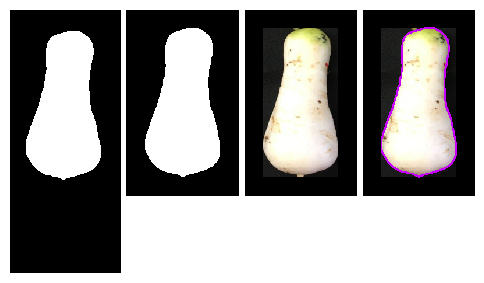

In [92]:
resultplot(0)

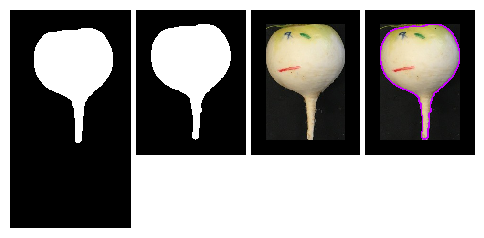

In [93]:
resultplot(1)

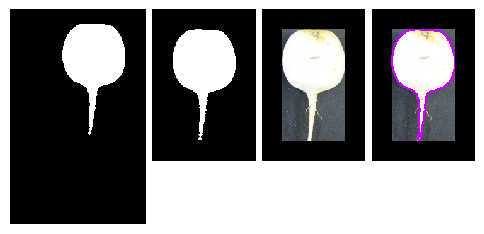

In [94]:
resultplot(4)

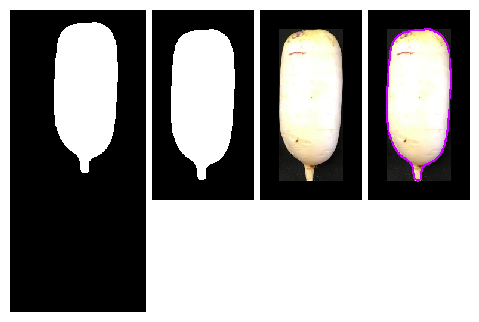

In [95]:
resultplot(5)

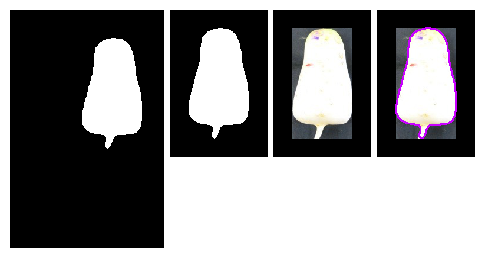

In [96]:
resultplot(6)

# 結果画像の保存

    MSF =  './RDSamples/silhoetteM' # 余白調節したシルエット画像
    MSRCF =  './RDSamples/croppedM' # 上記に対応する原画像

で指定したフォルダに結果画像を出力する。

In [97]:
for img,srcimg,path in zip(msimg,msrcimg,imgfiles):
    basename = os.path.basename(path)
    name,ext = os.path.splitext(basename)
    msname = MSF+"/MSil"+name[3:]+ext # マージン調整したシルエット画像のファイル名
    msrcname = MSRCF+"/MS"+name[3:]+ext
    cv2.imwrite(msname,img)
    cv2.imwrite(msrcname,srcimg)

In [ ]:
cv2.goodFeaturesToTrack()
gray = cv2.cvtColor(img[0],cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)

plt.imshow(img),plt.show()

In [ ]:
!python -m iGrabit